In [1]:
import os
import re

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Parse the log files

In [3]:
log_dir = "../logs"

log_files = [os.path.join(log_dir, f) for f in os.listdir(log_dir)]

In [4]:
ranks = []
rates = []

pattern = re.compile('.*Train samples (\S+) time (\S+) rate (\S+).*')
for log_file in log_files:
    with open(log_file) as f:
        _rates = []
        for l in f:
            m = pattern.match(l)
            if m:
                _rates.append(float(m.group(3)))
    ranks.append(len(_rates))
    rates.append(sum(_rates))

ranks = np.array(ranks)
rates = np.array(rates)

## Plot scaling

In [5]:
idx = ranks.argsort()
ranks = ranks[idx]
rates = rates[idx]

ideal_rates = rates[0] * ranks

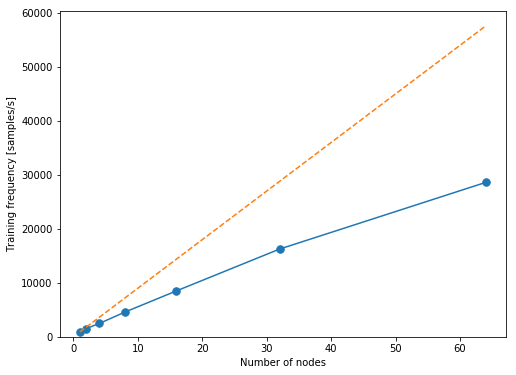

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ranks, rates, '.-', ms=15)
plt.plot(ranks, ideal_rates, '--')
plt.xlabel('Number of nodes')
plt.ylabel('Training frequency [samples/s]')
plt.ylim(ymin=0);

In [7]:
rates / ideal_rates

array([ 1.        ,  0.84793971,  0.68456951,  0.63649693,  0.59101276,
        0.56437911,  0.49666326])

(0, 1.0251668369110689)

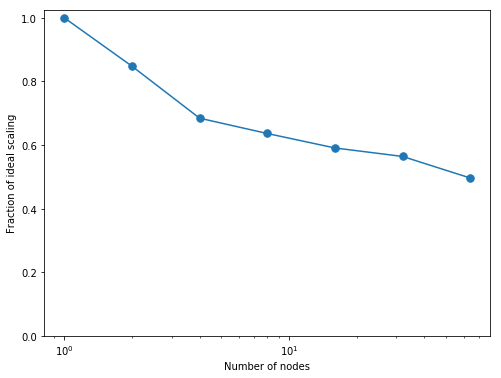

In [8]:
# Plot the fraction of ideal scaling
plt.figure(figsize=(8, 6))
plt.semilogx(ranks, rates / ideal_rates, '.-', ms=15)
plt.xlabel('Number of nodes')
plt.ylabel('Fraction of ideal scaling')
plt.ylim(ymin=0)